# Taller Raíces

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fixed_point, bisect, newton, root_scalar, fsolve

## 1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


$$
\theta - \sin \theta = \frac{\pi}{2}
$$


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior (Para este punto se recomienda emplear `dataframe`)..

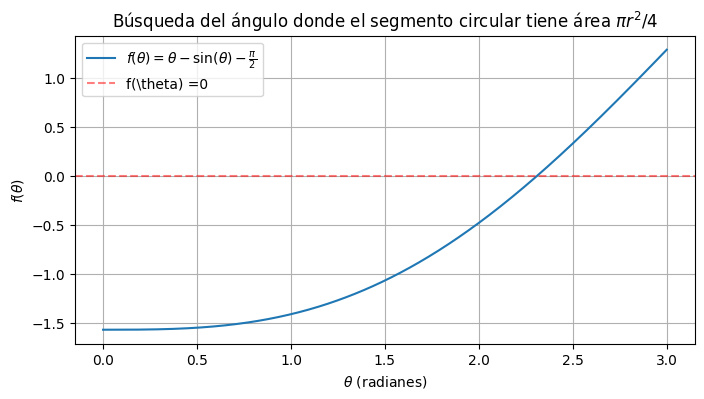

In [3]:
# Definimos la función
def f(theta):
    return theta - np.sin(theta) - np.pi/2

# Rango de theta para graficar
theta = np.linspace(0, 3, 500)
y = f(theta)

# Graficamos
plt.figure(figsize=(8, 4))
plt.plot(theta, y, label=r'$f(\theta) = \theta - \sin(\theta) - \frac{\pi}{2}$')
plt.axhline(0, color='red', linestyle='--', alpha=0.5, label=r'f(\theta) =0')
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$f(\theta)$')
plt.title(r'Búsqueda del ángulo donde el segmento circular tiene área $\pi r^2/4$')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("La función no cambia de signo en el intervalo [a, b].")
    
    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
    
    return (a + b) / 2

# Aplicamos bisección en [2, 2.5]
theta_biseccion = bisection_method(f, 2, 2.5)
print(f"Solución por bisección: θ ≈ {theta_biseccion:.6f} radianes")

Solución por bisección: θ ≈ 2.309882 radianes


In [5]:
def g(theta):
    return np.sin(theta) + np.pi/2

def fixed_point_method(g, theta0, tol=1e-6, max_iter=100):
    theta = theta0
    for i in range(max_iter):
        theta_next = g(theta)
        if abs(theta_next - theta) < tol:
            return theta_next
        theta = theta_next
    return theta

# Aplicamos punto fijo con un ángulo inicial= 2.3
theta_punto_fijo = fixed_point_method(g, 2.3)
print(f"Solución por punto fijo: θ ≈ {theta_punto_fijo:.6f} radianes")

Solución por punto fijo: θ ≈ 2.309881 radianes


In [6]:
def df(theta):
    return 1 - np.cos(theta)

def newton_method(f, df, theta0, tol=1e-6, max_iter=100):
    theta = theta0
    for i in range(max_iter):
        delta = f(theta) / df(theta)
        theta -= delta
        if abs(delta) < tol:
            return theta
    return theta

# Aplicamos Newton con un ángulo inicial = 2.3
theta_newton = newton_method(f, df, 2.3)
print(f"Solución por Newton: θ ≈ {theta_newton:.6f} radianes")

Solución por Newton: θ ≈ 2.309881 radianes


In [7]:
def secant_method(f, a, b, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        fa, fb = f(a), f(b)
        c = b - fb * (b - a) / (fb - fa)
        if abs(c - b) < tol:
            return c
        a, b = b, c
    return b

# Aplicamos secante en [2, 2.5]
theta_secante = secant_method(f, 2, 2.5)
print(f"Solución por secante: θ ≈ {theta_secante:.6f} radianes")

Solución por secante: θ ≈ 2.309881 radianes


In [8]:
resultados = pd.DataFrame({
    "Método": ["Bisección", "Punto Fijo", "Newton", "Secante"],
    "θ (rad)": [theta_biseccion, theta_punto_fijo, theta_newton, theta_secante],
    "Error relativo": [
        abs(theta_biseccion - theta_newton) / theta_newton,
        abs(theta_punto_fijo - theta_newton) / theta_newton,
        0,  # Newton es nuestra referencia
        abs(theta_secante - theta_newton) / theta_newton
    ]
})

print(resultados)

       Método   θ (rad)  Error relativo
0   Bisección  2.309882    3.047738e-07
1  Punto Fijo  2.309881    1.473827e-07
2      Newton  2.309881    0.000000e+00
3     Secante  2.309881    0.000000e+00


Utilicemos scipy para comparar

In [9]:
raiz_b = bisect(f,2, 2.5, xtol=1e-6) # Bisección
raiz_n = newton(f, 2.2, fprime=df, tol=1e-6) # Newton-Raphson
raiz_f = fixed_point(g, 2.2, xtol=1e-6) # Punto fijo
raiz_r = root_scalar(f, x0 = 2.2, method = 'secant') # Secante
raiz_fsolve = fsolve(f,2)[0] # fsolve

print(f'La raiz por el método de Bisección será {raiz_b}')
print(f'La raiz por el método de Newton-Raphson será {raiz_n}')
print(f'La raiz por el método del punto fijo será {raiz_f}')
print(f'La raiz por el método de la secante será {raiz_r.root}')
print(f'La raiz por el método de fsolve será {raiz_fsolve}')


La raiz por el método de Bisección será 2.309882164001465
La raiz por el método de Newton-Raphson será 2.309881460010057
La raiz por el método del punto fijo será 2.3098814600100286
La raiz por el método de la secante será 2.3098814600100575
La raiz por el método de fsolve será 2.309881460010033


## 2
La velocidad $v$ de un cohete Saturno V en vuelo vertical cerca de la superficie de la Tierra puede aproximarse mediante:

$$v = u \ln \left( \frac{M_0}{M_0 - \dot{m}t} \right) - gt$$

donde:

- $ u = 2510 \, \text{m/s} $ = velocidad del escape relativa al cohete  
- $ M_0 = 2.8 \times 10^6 \, \text{kg} $ = masa del cohete al despegue  
- $ \dot{m} = 13.3 \times 10^3 \, \text{kg/s} $ = tasa de consumo de combustible  
- $ g = 9.81 \, \text{m/s}^2 $ = aceleración gravitacional  
- $ t $ = tiempo medido desde el despegue  

Determinar el tiempo en el que el cohete alcanza la velocidad del sonido (335 m/s).

In [10]:
# Parámetros del problema
u = 2510          # m/s
M0 = 2.8e6        # kg
m_dot = 13.3e3    # kg/s
g = 9.81          # m/s²
v_sonido = 335    # m/s

# Función v(t)
def v(t):
    return u * np.log(M0 / (M0 - m_dot * t)) - g * t

# Función f(t) = v(t) - v_sonido = 0
def f(t):
    return v(t) - v_sonido

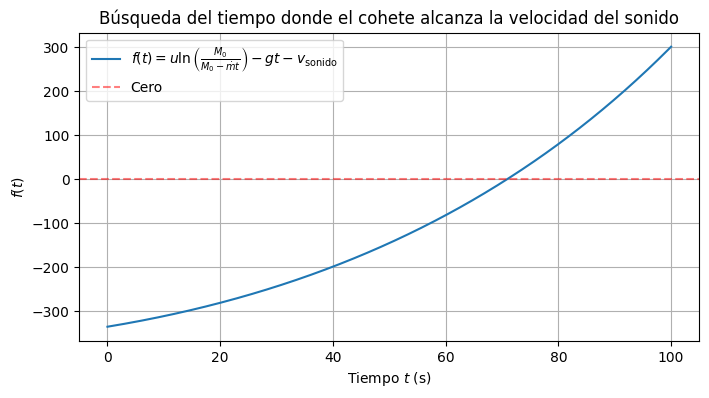

In [11]:
# Rango de tiempo 
t_values = np.linspace(0, 100, 500)
f_values = f(t_values)

plt.figure(figsize=(8, 4))
plt.plot(t_values, f_values, label=r'$f(t) = u \ln\left(\frac{M_0}{M_0 - \dot{m}t}\right) - gt - v_{\text{sonido}}$')
plt.axhline(0, color='red', linestyle='--', alpha=0.5, label='Cero')
plt.xlabel('Tiempo $t$ (s)')
plt.ylabel('$f(t)$')
plt.title('Búsqueda del tiempo donde el cohete alcanza la velocidad del sonido')
plt.grid()
plt.legend()
plt.show()

In [12]:
t_biseccion = bisection_method(f, 60, 80)
print(f"Solución por bisección: t ≈ {t_biseccion:.6f} s")

Solución por bisección: t ≈ 70.877972 s


## 3
Determine las coordenadas de los dos puntos donde se intersectan los círculos $(x - 2)^2 + y^2 = 4$ y $x^2 + (y - 3)^2 = 4$. Comience estimando las ubicaciones de los puntos a partir de un bosquejo de los círculos, y luego utiliza el método de Newton-Raphson para calcular las coordenadas.

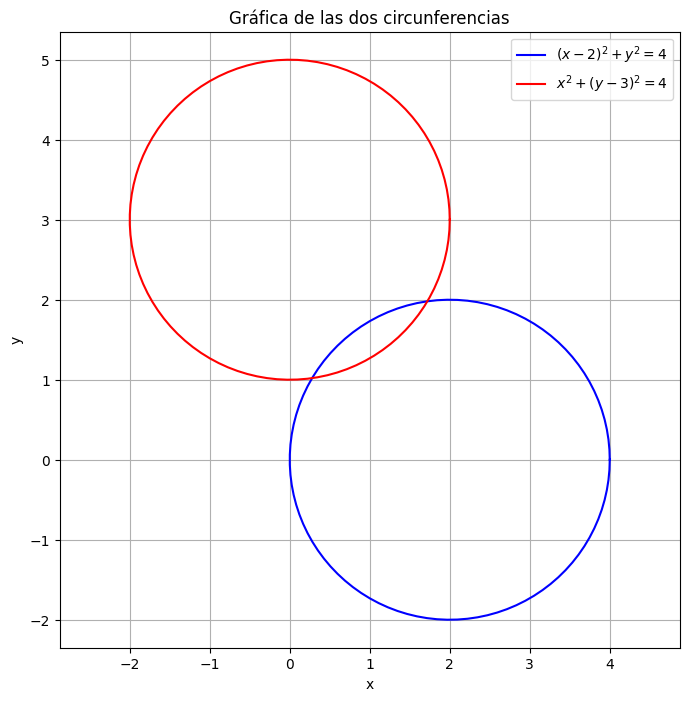

In [13]:
theta = np.linspace(0, 2 * np.pi, 100)

# Circle 1: (x - 2)² + y² = 4 → Center (2, 0), Radius 2
x_c1 = 2 + 2 * np.cos(theta)
y_c1 = 0 + 2 * np.sin(theta)

# Circle 2: x² + (y - 3)² = 4 → Center (0, 3), Radius 2
x_c2 = 0 + 2 * np.cos(theta)
y_c2 = 3 + 2 * np.sin(theta)

# Graficamos las circunferencias
plt.figure(figsize=(8, 8))
plt.plot(x_c1, y_c1, 'b-', label='$(x - 2)^2 + y^2 = 4$')
plt.plot(x_c2, y_c2, 'r-', label='$x^2 + (y - 3)^2 = 4$')


plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de las dos circunferencias')
plt.axis('equal')
plt.legend()
plt.show()

Primero igualamos ambas ecuaciones
$$
(x-2)^2+y^2=x^2+(y-3)^2
$$
$$
6y-4x=5
$$
$$
y=\frac{4x+5}{6}.
$$
Reemplazamos esta expresión en cualquiera de las circunferencias
$$
(x-2)^2+\left(\frac{4x+5}{6}\right)^2=4
$$

In [14]:
def f(x):
    return (x - 2)**2 + ((4*x + 5)/6)**2 - 4

def df(x):
    return 2*(x - 2) + 2*(4*x + 5)/6 * (4/6)

def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        delta = f(x) / df(x)
        x -= delta
        if abs(delta) < tol:
            return x
    return x

# Soluciones para x
x1 = newton_method(f, df, 0.1)
x2 = newton_method(f, df, 2.0)

# Correspondientes y
y1 = (4*x1 + 5) / 6
y2 = (4*x2 + 5) / 6

print(f"Punto 1: ({x1:.6f}, {y1:.6f})")
print(f"Punto 2: ({x2:.6f}, {y2:.6f})")

Punto 1: (0.279423, 1.019616)
Punto 2: (1.720577, 1.980384)


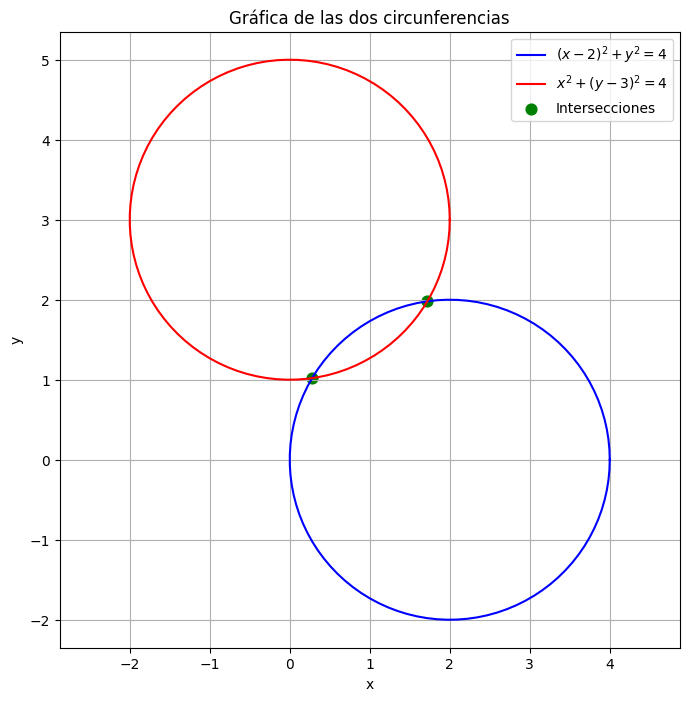

In [15]:
# Graficamos las circunferencias y los puntos de intersección
plt.figure(figsize=(8, 8))
plt.plot(x_c1, y_c1, 'b-', label='$(x - 2)^2 + y^2 = 4$')
plt.plot(x_c2, y_c2, 'r-', label='$x^2 + (y - 3)^2 = 4$')
plt.scatter(x1,y1,color='green',s=60, label='Intersecciones')
plt.scatter(x2,y2,color='green', s=60)


plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de las dos circunferencias')
plt.axis('equal')
plt.legend()
plt.show()

## 4
Una partícula parte del reposo en un plano inclinado liso cuyo ángulo $\theta$ cambia a una tasa constante:

$$\frac{d\theta}{dt} = \omega < 0.$$

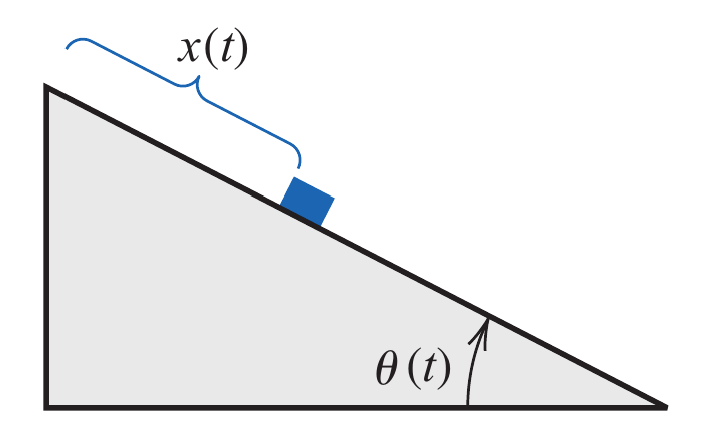

Al cabo de $t$ segundos, la posición del objeto está dada por:

$$x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t} - e^{-\omega t}}{2} - \sin \omega t \right).$$

Suponga que la partícula se ha movido 1.7 pies en 1 segundo. Encuentre, con una precisión de $ 10^{-5}$, la tasa $ \omega $ a la que cambia $\theta$. Asuma que $g = 32.17 \, \text{ft/s}^2 $.

In [16]:
def f(omega):
    g = 32.17
    return (g / (2 * omega**2))* ((np.exp(omega)-np.exp(-omega))/2 - np.sin(omega)) + 1.7

In [17]:
omega_solution = bisection_method(f, -2, -0.1)
print(f"La solución es = {omega_solution:.6f}")

La solución es = -0.317062


## 5
Un objeto que cae verticalmente a través del aire está sujeto a resistencia viscosa además de la fuerza de gravedad. Suponga que un objeto con masa $m$ se deja caer desde una altura $s_0$ y que la altura del objeto después de $t$ segundos es:

$$s(t) = s_0 - \frac{mg}{k}t + \frac{m^2 g}{k^2}(1 - e^{-kt/m}),$$

donde $g = 32.17 \, \text{ft/s}^2 $ y $ k $ representa el coeficiente de resistencia del aire en lb-s/ft. Suponga que $s_0 = 300 \, \text{ft} $, $ m = 0.25 \, \text{lb} $, y $ k = 0.1 \, \text{lb-s/ft} $. Encuentre, con una precisión de 0.01 s, el tiempo que tarda este objeto de un cuarto de libra en llegar al suelo.

In [18]:
# Parámetros
s0 = 300  # ft
m = 0.25  # lb
k = 0.1   # lb-s/ft
g = 32.17 # ft/s^2

# Función f(t)
def f(t):
    return s0 - (m * g / k) * t +(m**2 * g / k**2) * (1 - np.exp(-k * t / m))

# Derivada f'(t)
def f_prime(t):
    return - (m * g / k) + (m * g / k) * np.exp(-k * t / m)


# Valor inicial (estimado: t ≈ 4 s)
t0 = 4.0

# Resolver
t_solution = newton_method(f, f_prime, t0)

print(f"El tiempo que tarda en llegar al suelo es: {t_solution:.2f} s")

El tiempo que tarda en llegar al suelo es: 6.00 s
